<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/my_first_data_analysis_for_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **라이브러리**

In [3]:
import numpy as np # 수치 연산
import pandas as pd # 데이터생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#
import missingno as msno

#warning 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터형성

In [5]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [10]:
df_train.shape

(891, 12)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Null 데이터 확인하기

In [12]:
for col in df_train.columns:
    msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [13]:
for col in df_test.columns:
    msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 20.57%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.24%
column:      Cabin	 Percent of Nan value: 78.23%
column:   Embarked	 Percent of Nan value: 0.00%


# 시각화

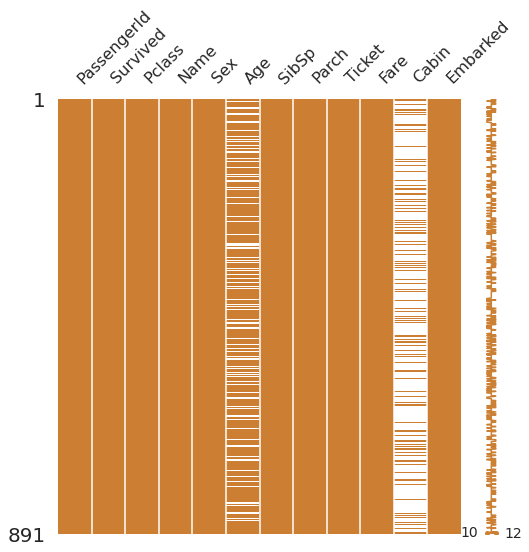

In [14]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8, 0.5, 0.2))

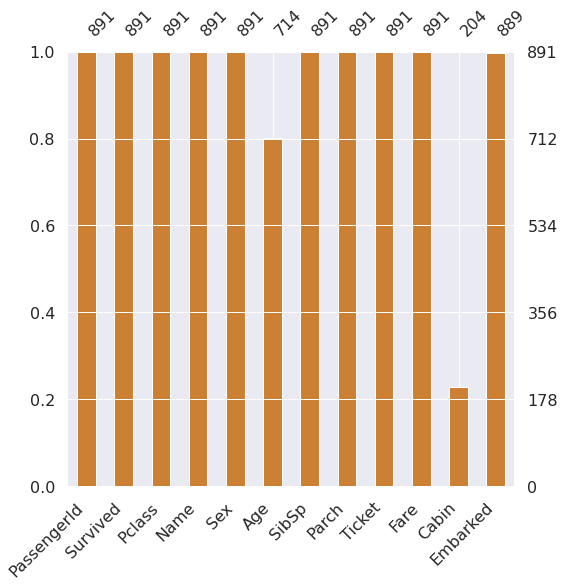

In [15]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8, 0.5, 0.2))

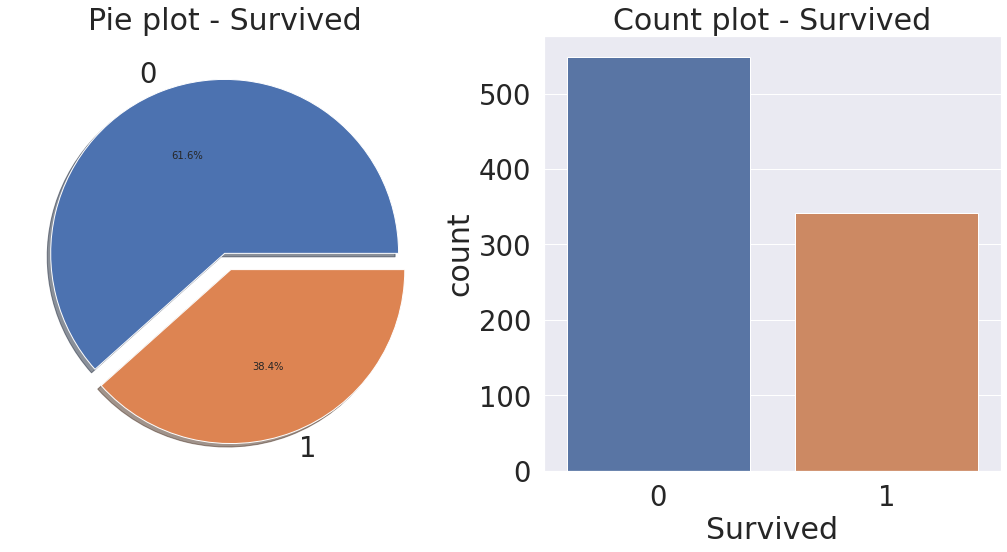

In [16]:
# 1행 2열 f는 figure 전체plot, ax는 axes 부분plot 가로 18 세로 8
f, ax=plt.subplots(1,2,figsize=(18,8))

#df_train['Survived'].value_counts()는 생존자수를 알려준다.
#pie는 원형으로 자료구성 explode는 간격 autopct 퍼센트의 형식
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1]) #Seaborn.countplot(카테고리,데이터,파트)
ax[1].set_title('Count plot - Survived')
plt.show()

# 2.1 Pclass

In [17]:
#각 객체들의 합 Sample의 합
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
#생존 0, 1 요소의 합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [19]:
#생존 0, 1 비율 = 생존률
#as_index=False 하면 Pclass는 index로 안씀
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean() 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


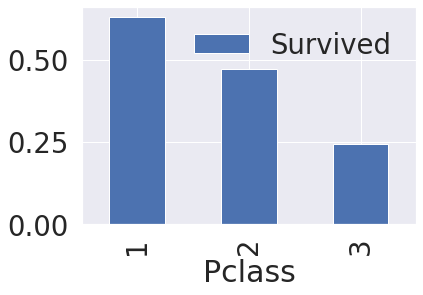

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

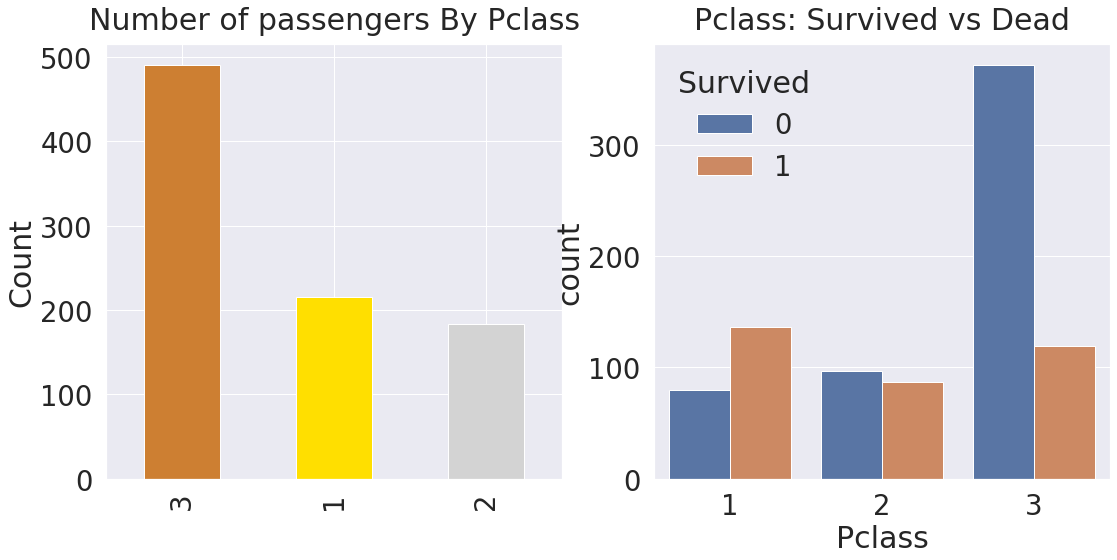

In [22]:
#y_position은 그래프 위치
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number of passengers By Pclass', y=y_position) 
ax[0].set_ylabel('Count') 
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position) 
plt.show()

# 2.2 Sex

<function matplotlib.pyplot.show>

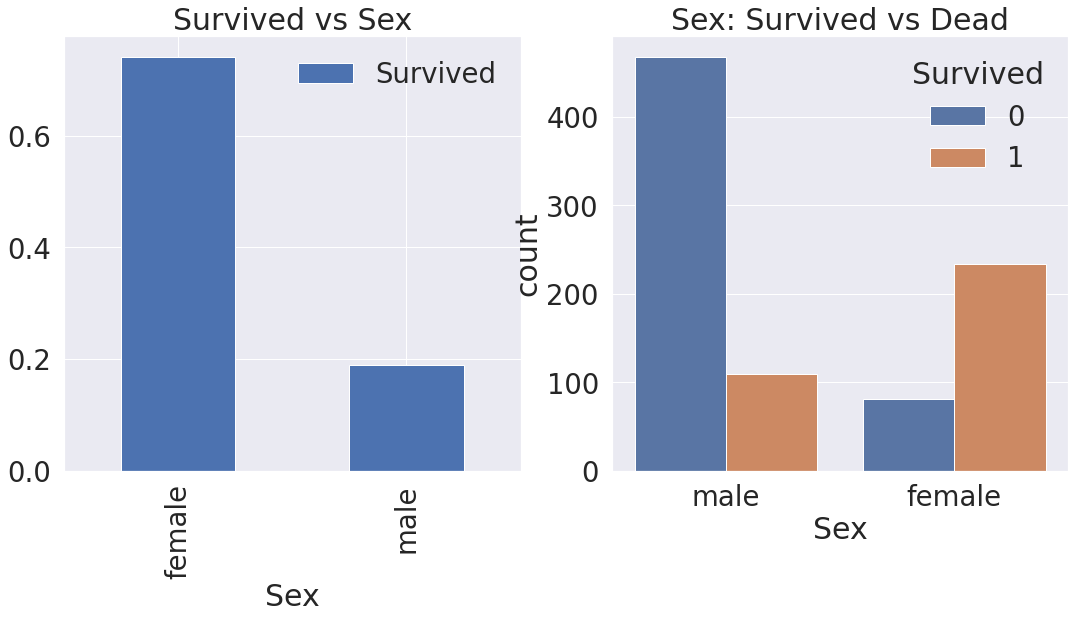

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show

In [24]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


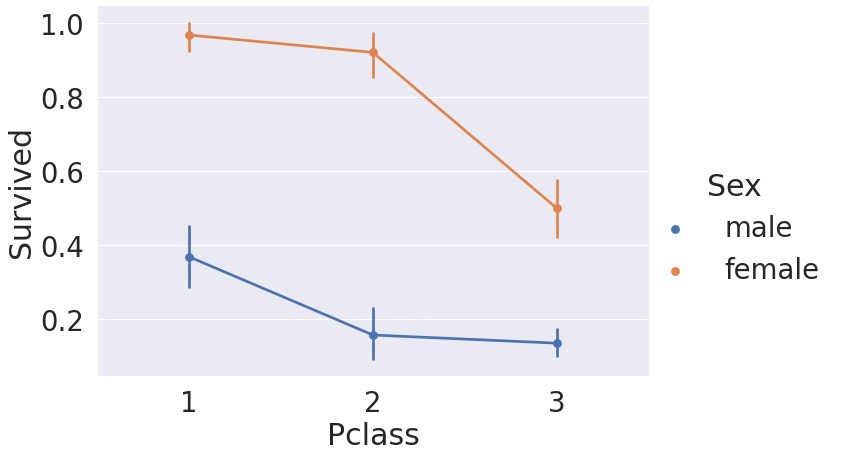

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

# -Lady first,
# -Money brings survival?

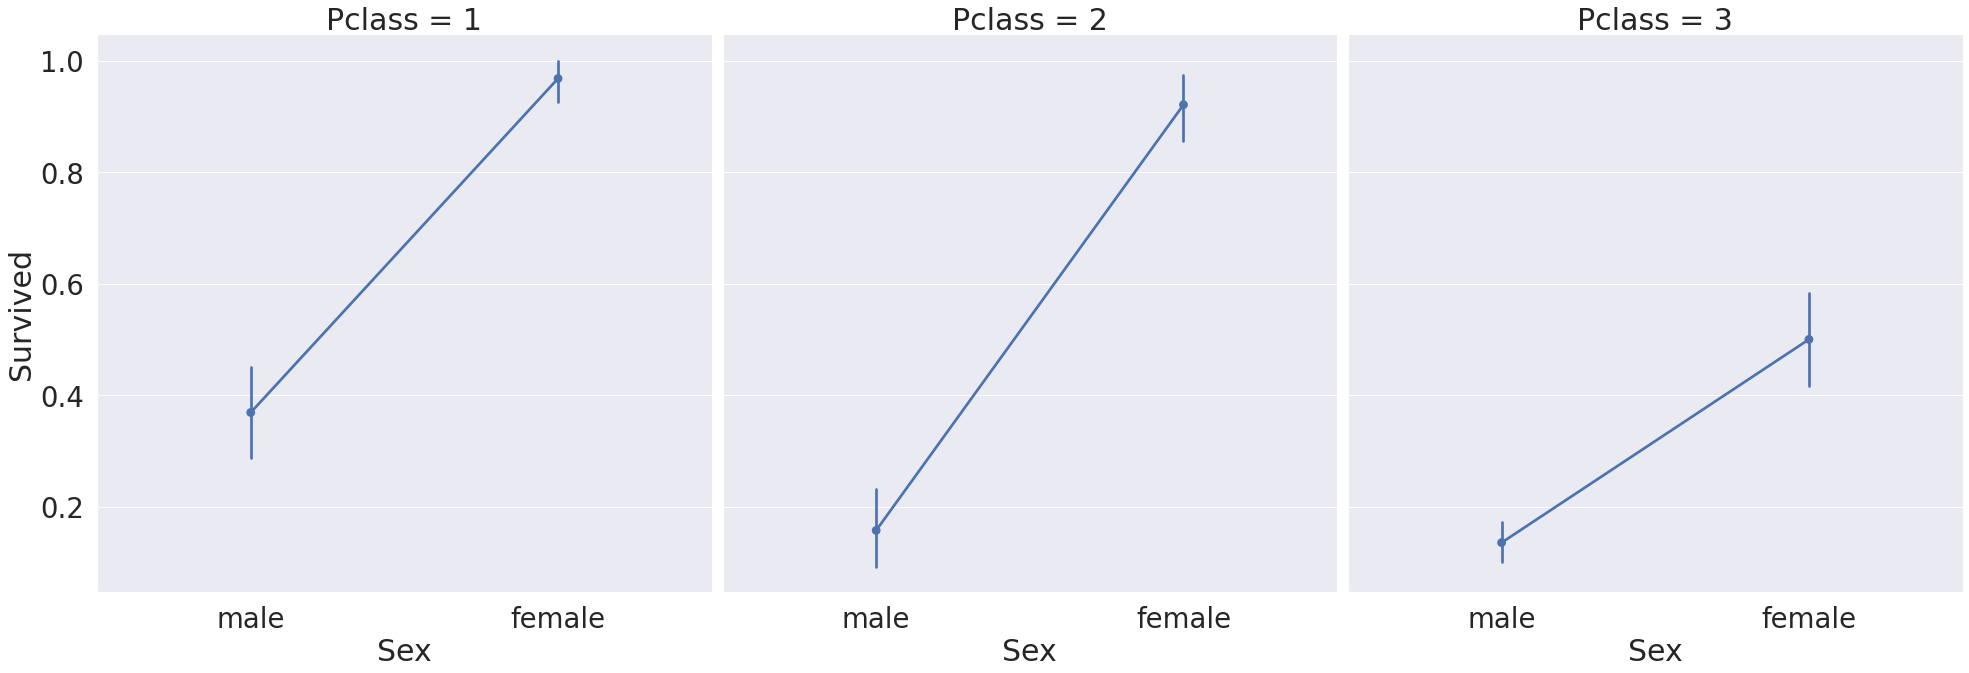

In [27]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=5,size=9,aspect=1)

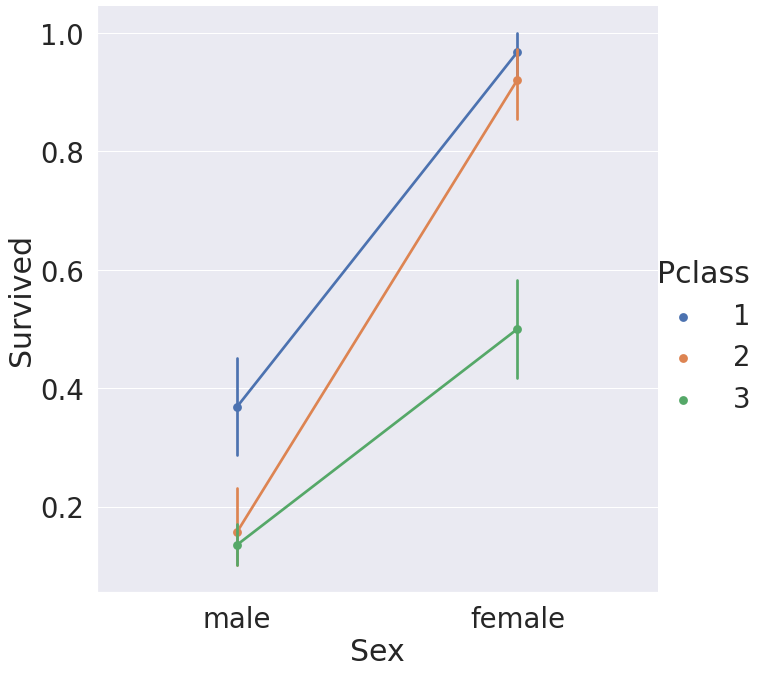

In [28]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train,saturation=5,size=9,aspect=1)

**AGE**
==

In [29]:
print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


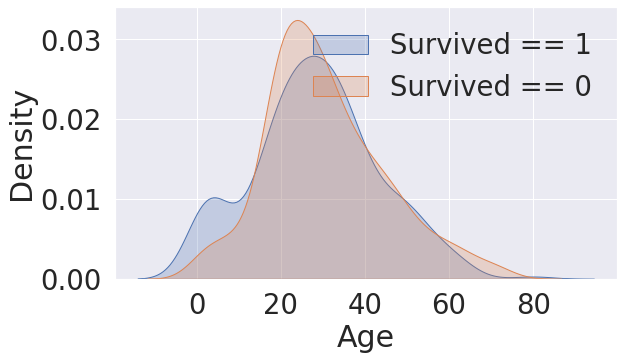

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], shade=True, ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], shade=True, ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

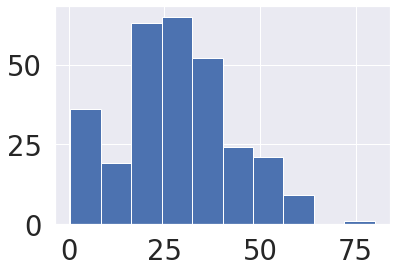

In [41]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [48]:
df_train.iloc[:,1] #Survival bool로 표시

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Figure size 720x720 with 0 Axes>

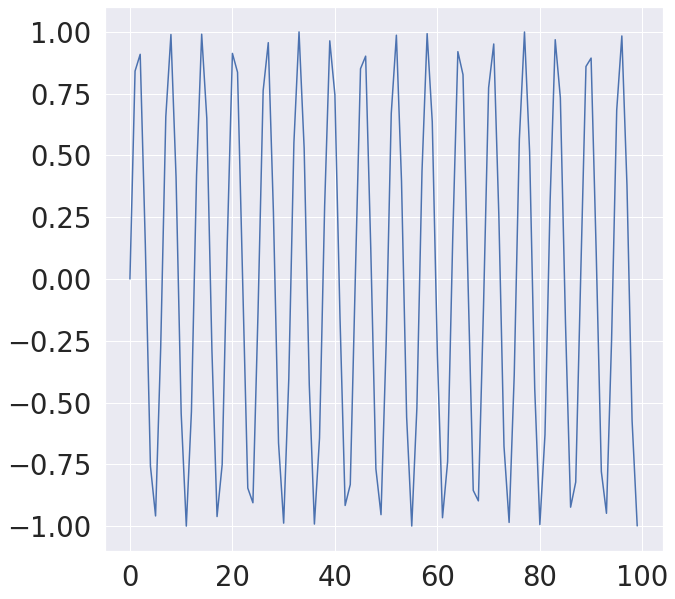

In [59]:
f = plt.figure(figsize=(10, 10)) #방법 1
f, ax = plt.subplots(1, 1, figsize=(10, 10)) # 방법 2
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

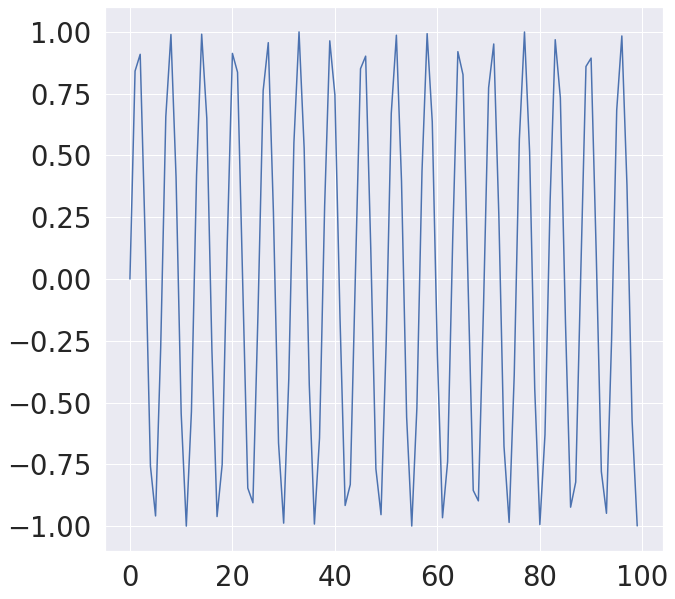

In [60]:
f = plt.figure(figsize=(10, 10)) #방법 1
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

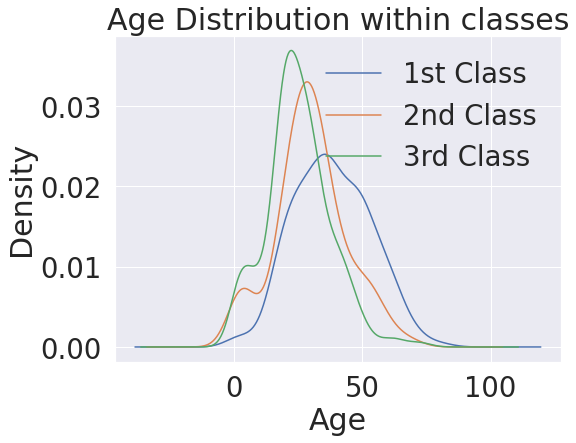

In [68]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

Text(0.5, 0, 'Age')

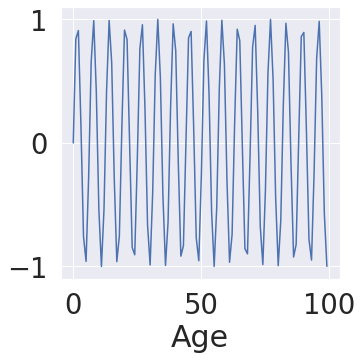

In [66]:
#이 경우 x_label을 위해 plt이 아니라 ax변수를 써야한다.
fig, ax = plt.subplots(1, 1 ,figsize=(5, 5))
a = np.arange(100)
b= np.sin(a)

ax.plot(b)
ax.set_xlabel('Age') 

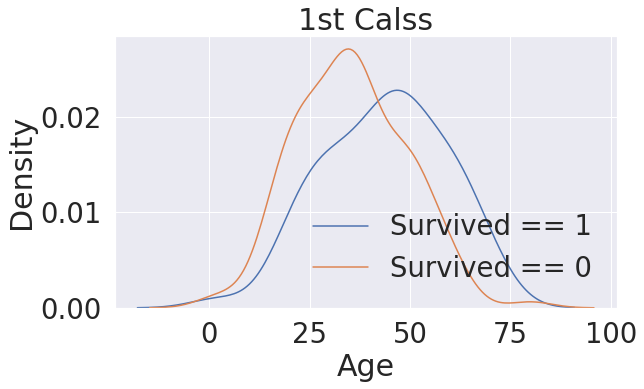

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Calss')
plt.show()

Text(0.5, 1.0, 'Age Distribution within classes')

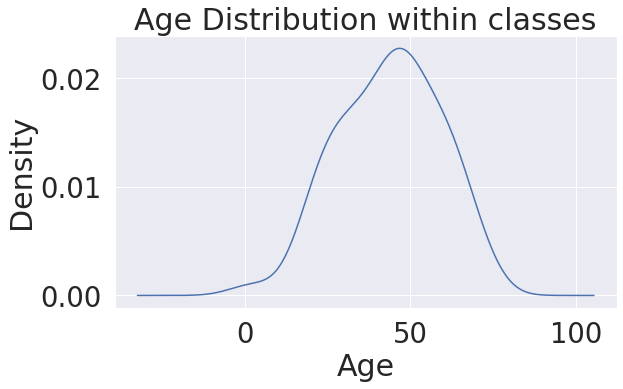

In [87]:
plt.figure(figsize=(9, 5))
df_train['Age'][(df_train['Pclass']==1) & (df_train['Survived'] == 0 )].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
#plt.legend(['1st Class','2nd Class','3rd Class'])

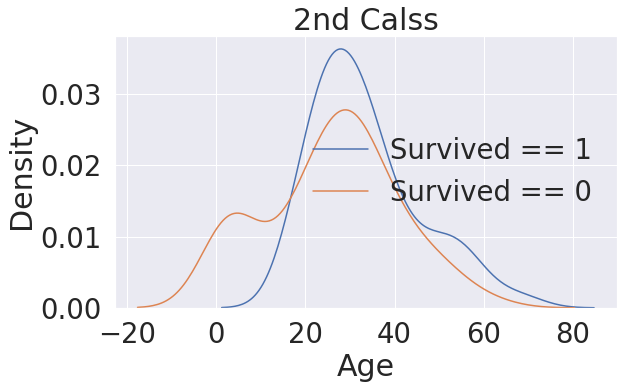

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd Calss')
plt.show()

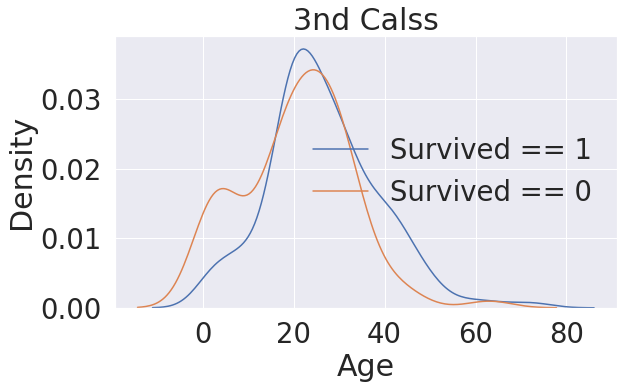

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 3)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3nd Calss')
plt.show()

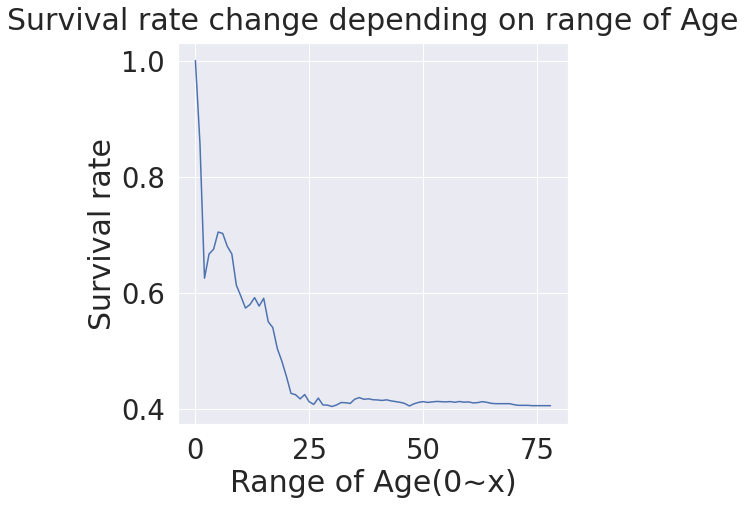

In [102]:
change_age_range_survival_ratio = []

for i in range(1, 80):
  change_age_range_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum()/ len(df_train[df_train['Age']< i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [96]:
i=10
df_train[df_train['Age']< i]['Survived'].sum()/ len(df_train[df_train['Age']< i]['Survived']) #10살 미만 생존 평균

0.6129032258064516

In [97]:
df_train[df_train['Age']< i]['Survived'].sum() #10살 미만 생존 아이들의 합

38

In [99]:
len(df_train[df_train['Age']< i]['Survived']) # 10살 미만 아이들 수

62

**Pclass,Sex,Age**
==

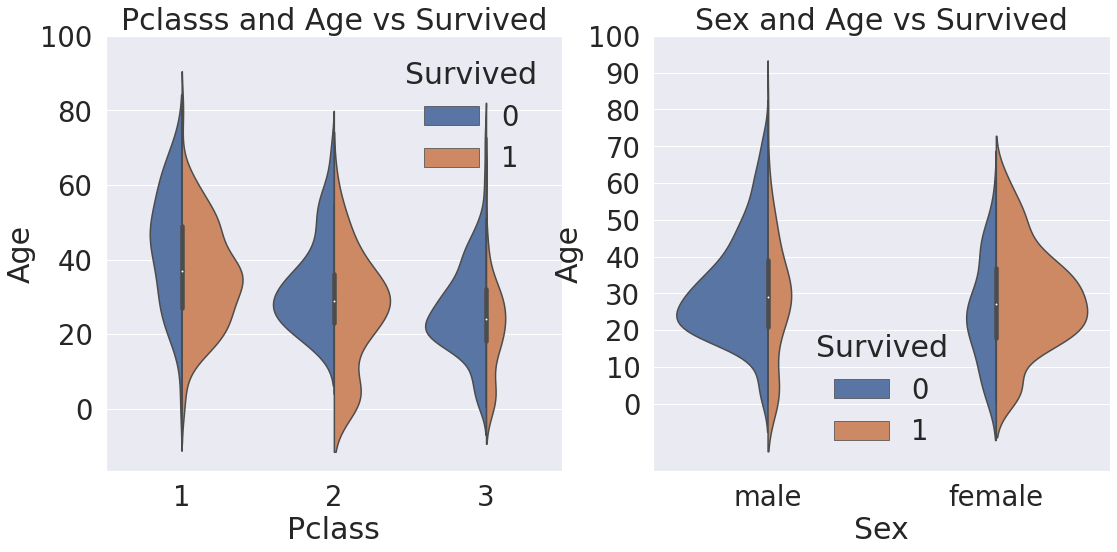

In [109]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count' ,split=True, ax=ax[0])
ax[0].set_title('Pclasss and Age vs Survived')
ax[0].set_yticks(range(0,110,20))

sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count' ,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Embarked**
==

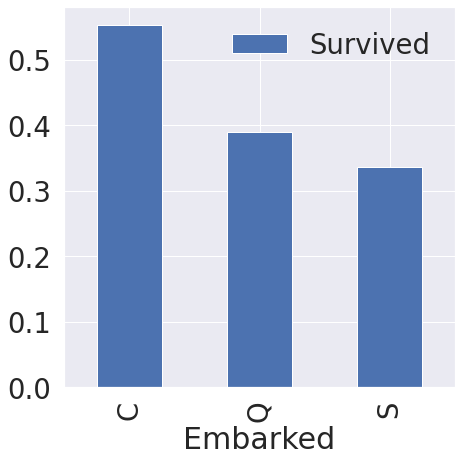

In [111]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [119]:
#value값에 대해서 Sort하는것을 의미 ascending은 오름차순 내림차순
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


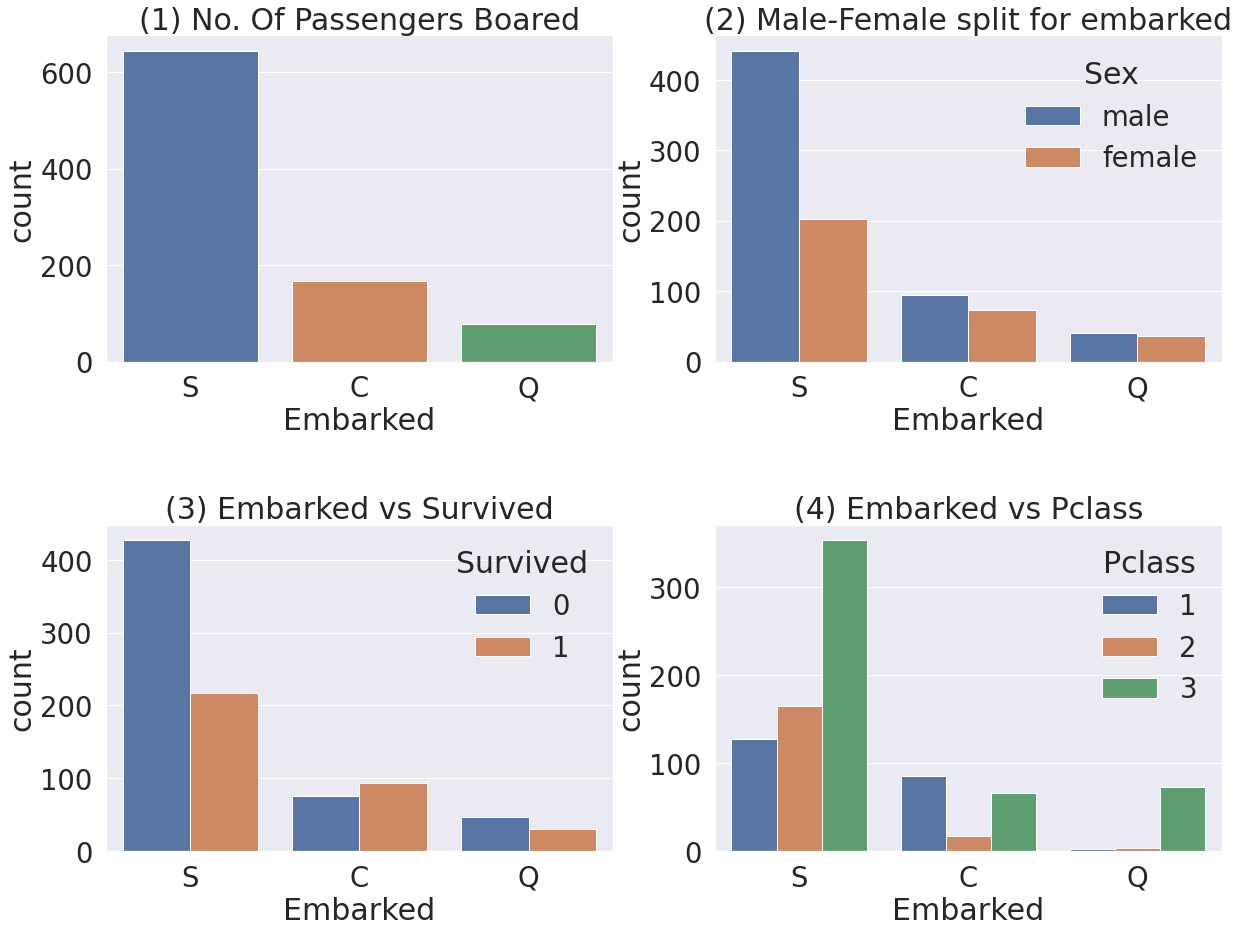

In [125]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked',hue='Sex' ,data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked',hue='Survived' ,data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass' ,data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5) #간격
plt.show()


**Family - SibSp + Parch**
==

In [127]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1

In [129]:
print('Maximum size of Family',df_train['FamilySize'].max())
print('Minimum size of Family',df_train['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


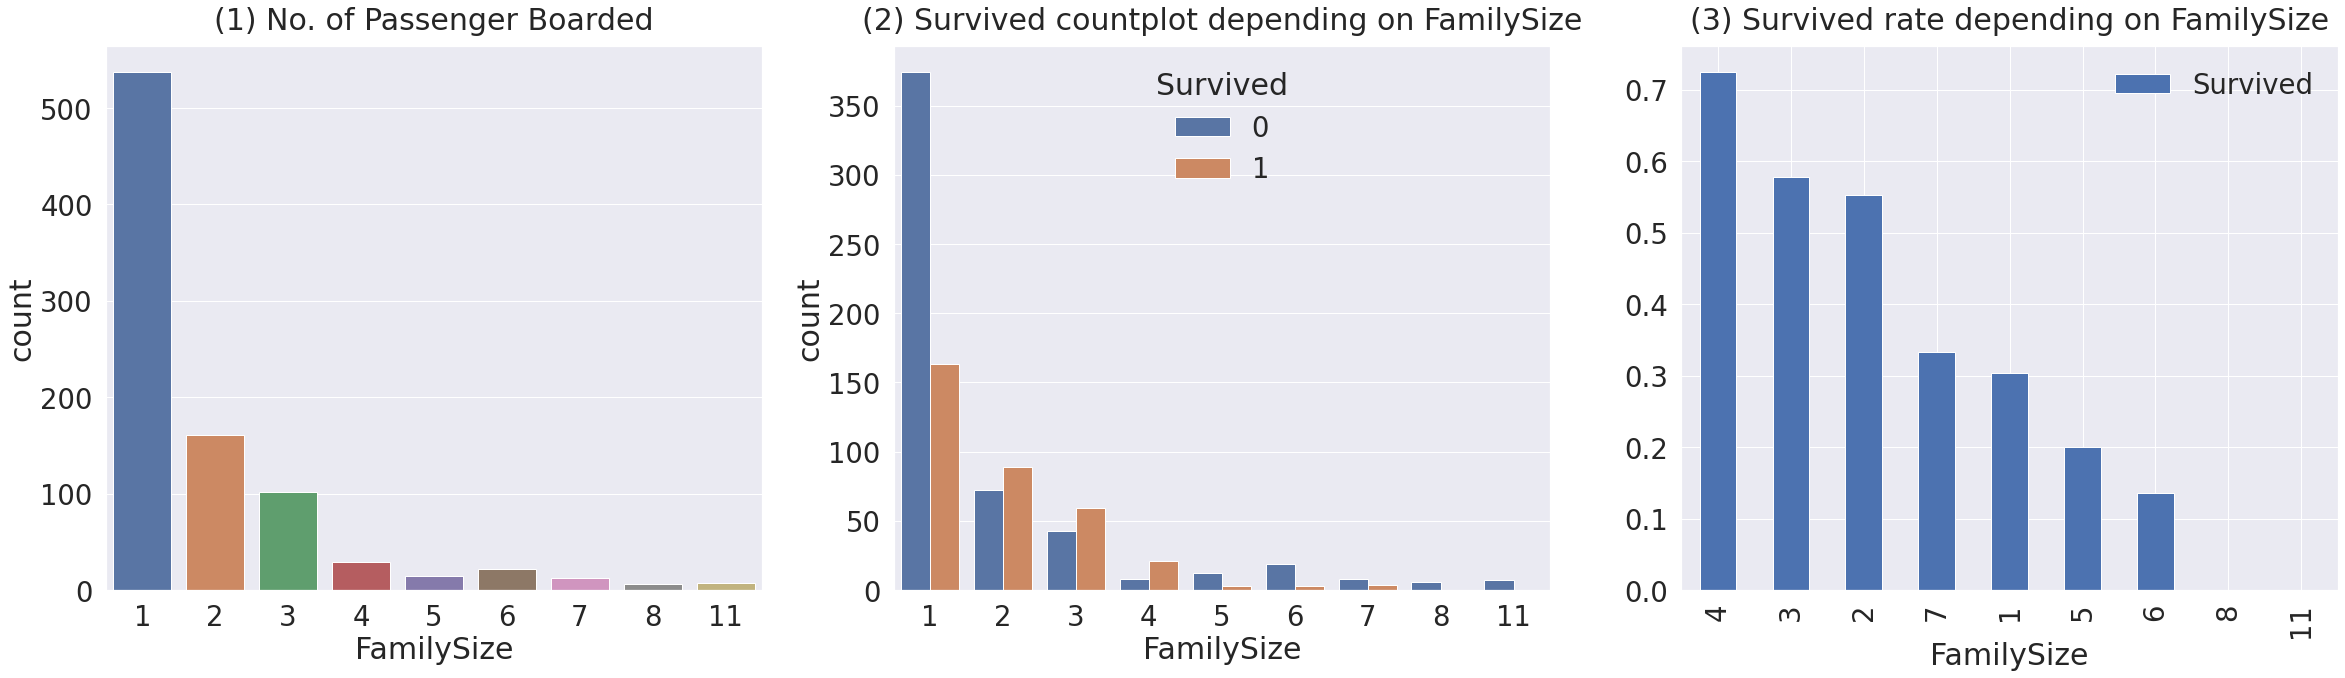

In [130]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded',y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5) #간격
plt.show()